In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

from prince import MCA, FAMD

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
data_url = "https://github.com/jhl126/bostonmarathon/blob/master/results/2014/results.csv?raw=true"

df = pd.read_csv(data_url)
df = df.drop(columns=["ctz"])

print("Columns with highest percent NA:")
# fmt: off
display(
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .head()
)
# fmt: on

df.head()

Columns with highest percent NA:


state        0.080540
city         0.000031
40k          0.000000
genderdiv    0.000000
name         0.000000
dtype: float64

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


<IPython.core.display.Javascript object>

In [5]:
df["country"].value_counts()
df.loc[~df["state"].isna(), "country"].value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
       ...  
BLR        1
CAY        1
TRI        1
ZIM        1
INA        1
Name: country, Length: 78, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
df = df.dropna(subset=["city"])

<IPython.core.display.Javascript object>

In [12]:
df["state"] = df["state"].fillna("Not US/CAN")

C:\Users\dgump\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [13]:
df.isna().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31983 entries, 0 to 31983
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31983 non-null  object 
 1   name       31983 non-null  object 
 2   division   31983 non-null  int64  
 3   25k        31983 non-null  object 
 4   gender     31983 non-null  object 
 5   age        31983 non-null  int64  
 6   official   31983 non-null  float64
 7   bib        31983 non-null  object 
 8   genderdiv  31983 non-null  int64  
 9   35k        31983 non-null  object 
 10  overall    31983 non-null  int64  
 11  pace       31983 non-null  float64
 12  state      31983 non-null  object 
 13  30k        31983 non-null  object 
 14  5k         31983 non-null  object 
 15  half       31983 non-null  object 
 16  20k        31983 non-null  object 
 17  country    31983 non-null  object 
 18  city       31983 non-null  object 
 19  40k        31983 non-null  object 
dtypes: flo

<IPython.core.display.Javascript object>

In [18]:
df["25k"].value_counts()

-         216
123.30     25
117.90     21
132.95     21
130.17     21
         ... 
165.33      1
201.38      1
170.97      1
90.43       1
206.18      1
Name: 25k, Length: 6570, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
df = df.replace("-", np.nan)

<IPython.core.display.Javascript object>

In [26]:
df.isna().mean()
df = df.dropna()

<IPython.core.display.Javascript object>

In [28]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

<IPython.core.display.Javascript object>

In [31]:
df = df.apply(pd.to_numeric, errors="ignore")
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

<IPython.core.display.Javascript object>

In [30]:
nums = df.select_dtypes("number")
nums.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


<IPython.core.display.Javascript object>

In [34]:
scaler = StandardScaler()
scaled = scaler.fit_transform(nums)

<IPython.core.display.Javascript object>

In [35]:
pca = PCA(2)
pcs = pca.fit_transform(scaled)

pc_df = pd.DataFrame(pcs, columns=["pc1", "pc2"])
pc_df.head()


,pc1,pc2
0,-10.844648,0.442839
1,-7.036020,-0.354789
2,-11.115377,0.027122
3,-7.050778,-0.969531
4,-11.045268,-0.037888


<IPython.core.display.Javascript object>

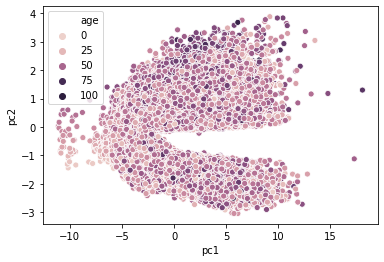

<IPython.core.display.Javascript object>

In [42]:
sns.scatterplot("pc1", "pc2", data=pc_df, hue=df["age"])

In [40]:
df["division"].value_counts()

1       23
3       22
2       22
8       20
5       20
        ..
6137     1
6935     1
6529     1
6250     1
6312     1
Name: division, Length: 6921, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
pca.explained_variance_ratio_


array([0.83416756, 0.10967037])

<IPython.core.display.Javascript object>

In [46]:
weights = pd.DataFrame(pca.components_, columns=nums.columns).T
weights.style.background_gradient()


,0,1
10k,0.283488,0.021137
division,0.157102,-0.627550
25k,0.289446,0.009784
age,0.048196,0.771460
official,0.288792,0.006617
genderdiv,0.258400,0.094360
35k,0.290136,0.003060
overall,0.281918,0.025769
pace,0.288793,0.006595
30k,0.290193,0.005963


<IPython.core.display.Javascript object>

In [55]:
k_means = KMeans(3)
k_means.fit(pcs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

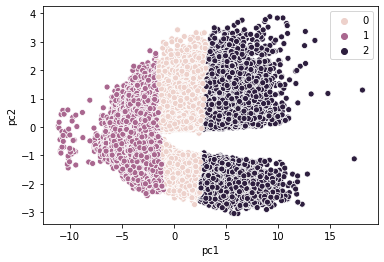

<IPython.core.display.Javascript object>

In [56]:
sns.scatterplot("pc1", "pc2", data=pc_df, hue=k_means.labels_)

In [57]:
df["label"] = k_means.labels_

clst_means = df.groupby("label").mean()
clst_means.style.background_gradient()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
label,,,,,,,,,,,,,,
0,52.855197,1816.784227,135.907575,46.375378,247.006677,9270.022777,199.472259,18863.102376,9.429283,166.621771,26.347920,113.359971,107.373558,232.735929
1,43.860378,1166.334980,111.075608,38.822588,196.822026,3656.269961,160.046555,6458.630667,7.515129,134.965264,21.930613,93.244339,88.367496,185.579088
2,64.267454,3568.690781,172.452647,41.863589,319.184700,14004.180629,258.707485,28231.767785,12.182136,214.347523,31.631081,141.707642,134.052042,301.527412


<IPython.core.display.Javascript object>

In [60]:
df.loc[df["label"] == 0, "country"].value_counts()

USA    10265
CAN     1014
GBR      124
ITA      100
GER       88
       ...  
POR        1
URU        1
TAN        1
DOM        1
PAN        1
Name: country, Length: 65, dtype: int64

<IPython.core.display.Javascript object>

## MCA

In [72]:
objs = df.select_dtypes("O")
objs = objs.drop(columns=["name", "bib", 'city'])

sample = objs.sample(frac=0.5, random_state=42)


<IPython.core.display.Javascript object>

In [73]:
mca = MCA()
mca.fit(sample)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

<IPython.core.display.Javascript object>

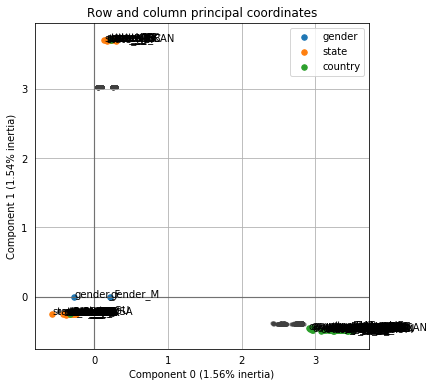

<IPython.core.display.Javascript object>

In [74]:
mca.plot_coordinates(sample, show_column_labels=True)